# Customer Churn Assigenment

In [456]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [457]:
df=pd.read_csv('customer_churn.csv') # Loading the dataset

In [458]:
df.head().T # First look at the data

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [459]:
df.info() # Checking columns and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [460]:
df.shape # Checking the number of rows and columns

(7043, 21)

In [461]:
df.isnull().sum() # There is No Null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [462]:
df.duplicated().sum() # There is Zero duplicates

0

In [463]:
df.drop('customerID',axis=1,inplace=True) # Dropping Unwanted Column

In [464]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Visualaization

In [465]:
# sorting the categorical columns in the variable called cat_columns for ploting the count with respect to the Churn colum
cat_columns = list(df.columns) 

In [466]:
elements_to_remove = ['tenure','MonthlyCharges','TotalCharges'] # Sorting the unwanted columns in count plot
for element in elements_to_remove: # using for loop to remove the columns in the cat columns
    cat_columns.remove(element) # with the help of remove function we can remove the elements in the list
print(cat_columns) # printing the elements in the list called cat_columns

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


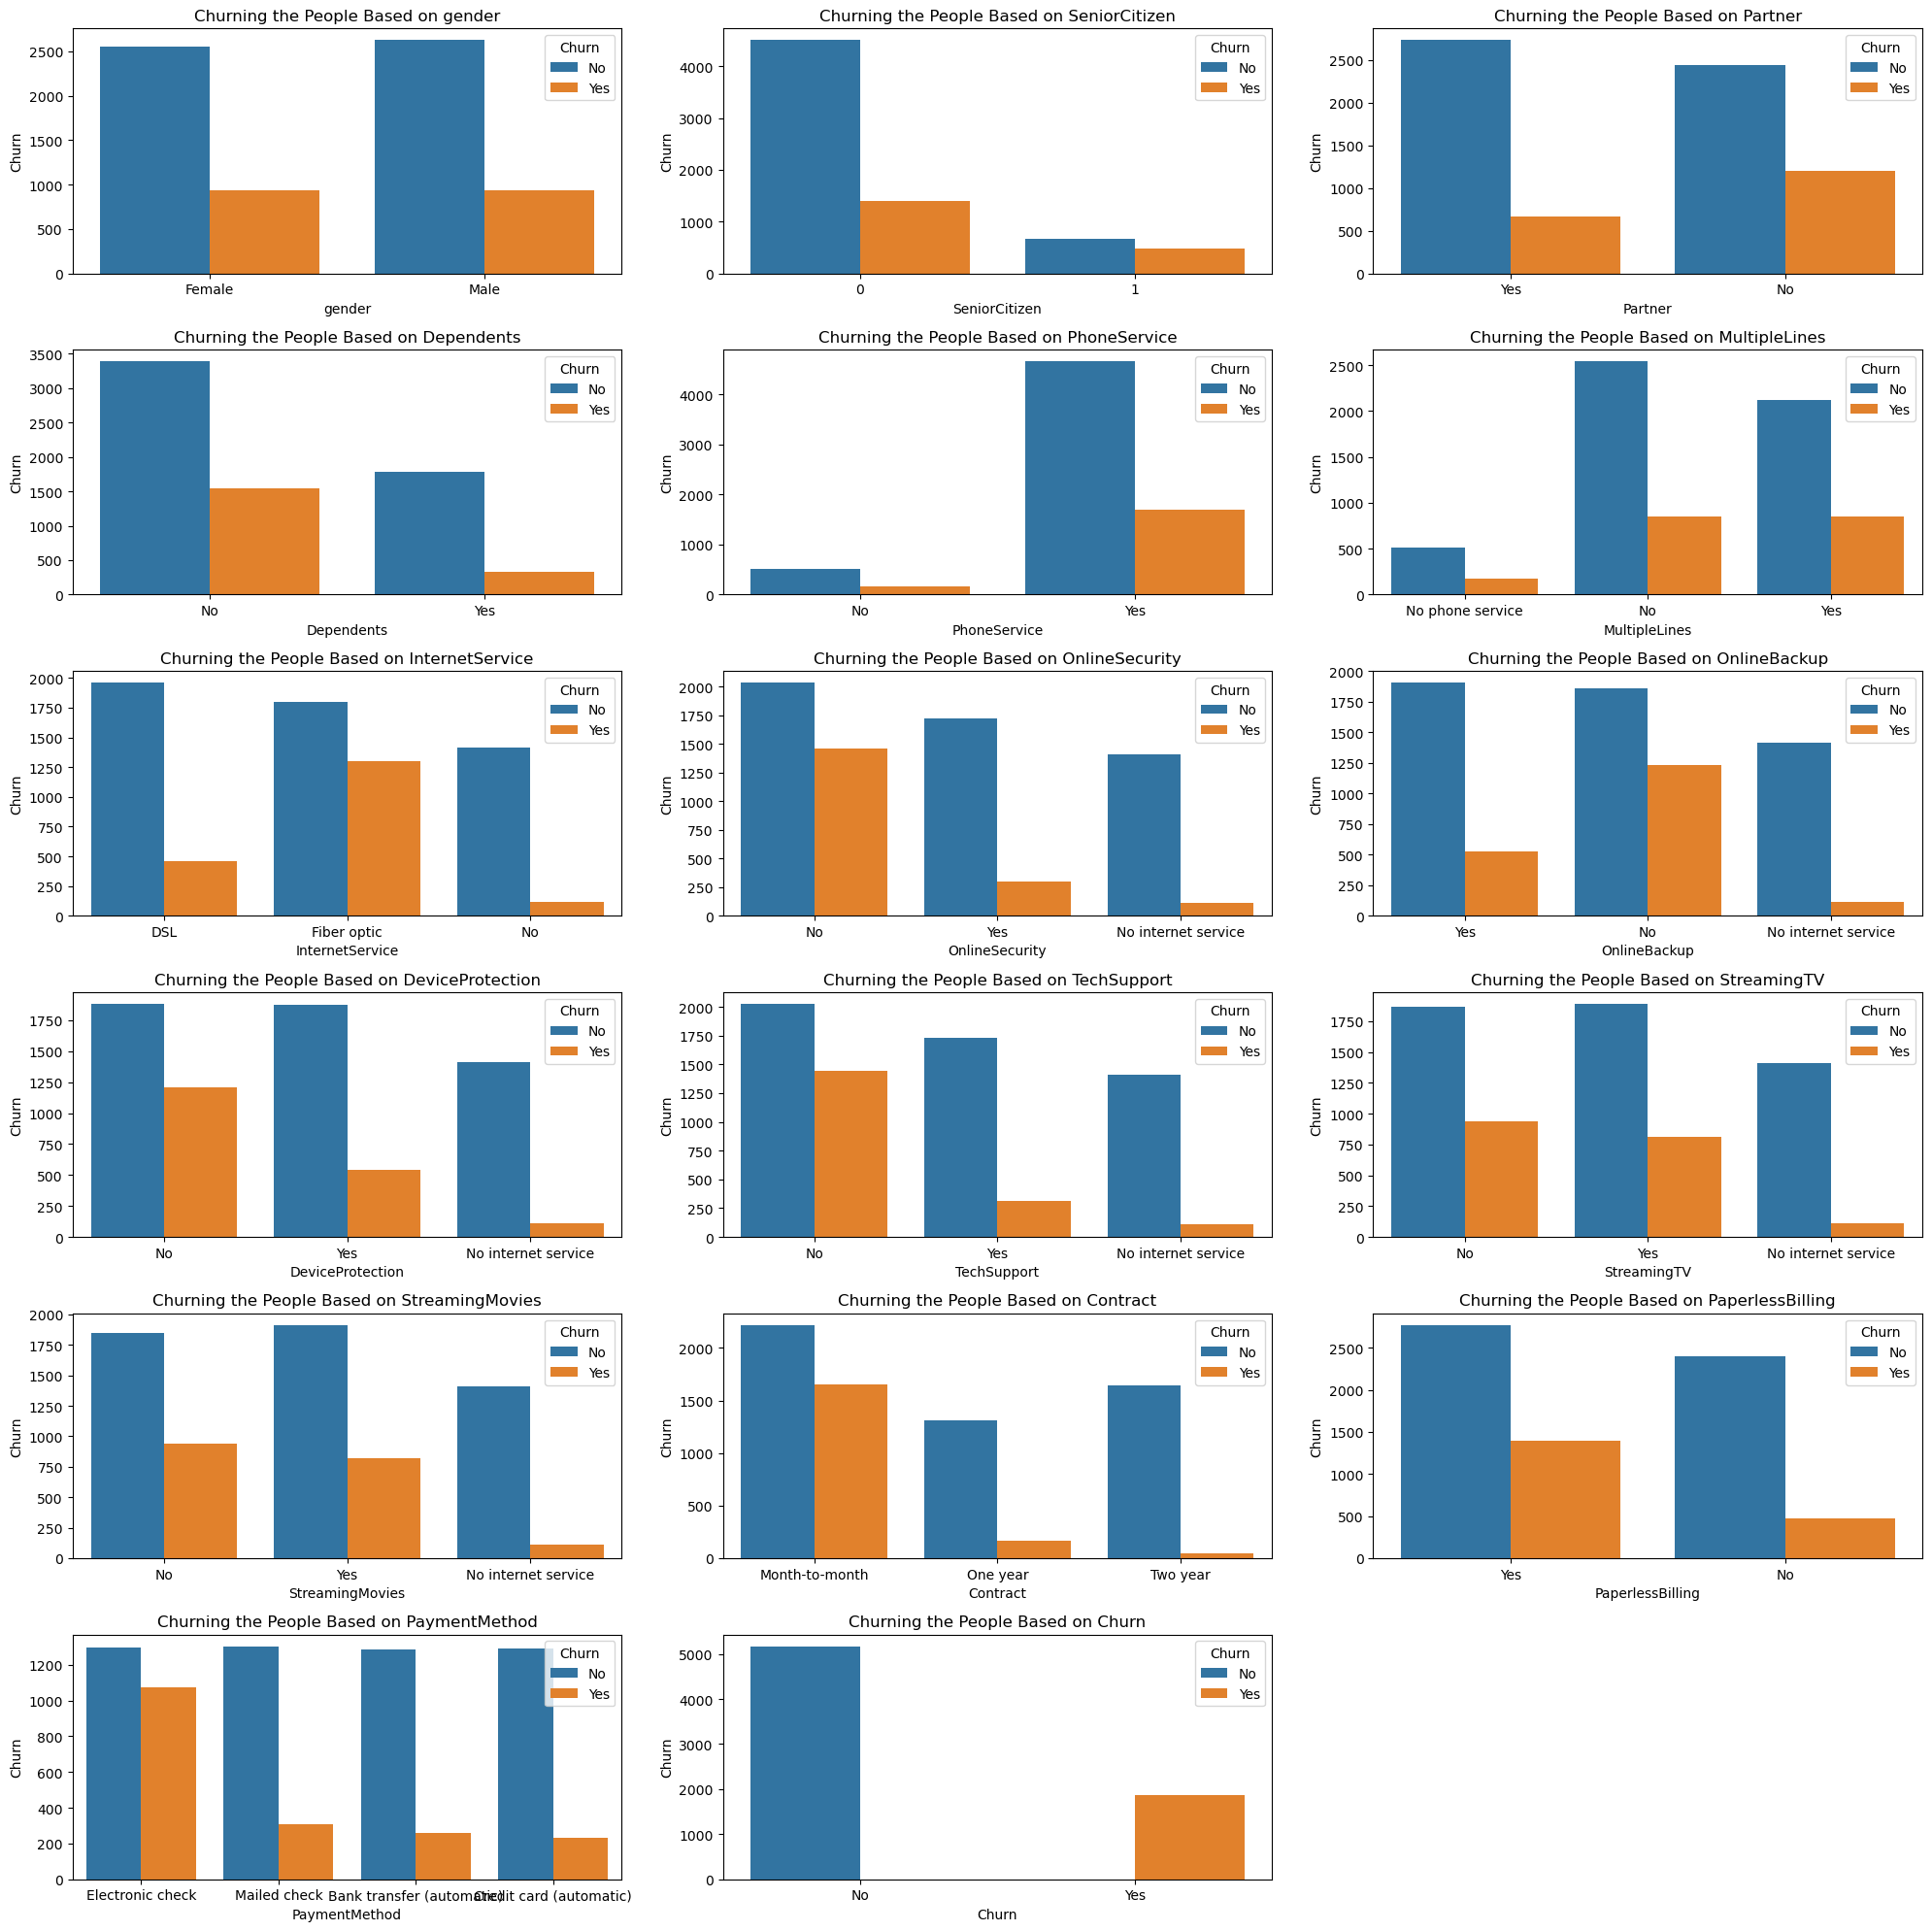

In [467]:
plt.figure(figsize=(20,20)) # Setting the size of plots
for i,column in enumerate(cat_columns): # using enumarate function in the for loop we trying to iterate over the columns in the cat_columns 
    plt.subplot(6,3,i+1) # setting the subplots
    sns.countplot(x=column,hue='Churn',data=df) # Building the countplot
    plt.xlabel(column) # Labeling the X axis with Column name
    plt.ylabel('Churn')# Labeling the Y axis with Count
    plt.title(f'Churning the People Based on {column}') # title
plt.tight_layout() # ensure that all the count plots are well setteld in the size
plt.show() # showing the plots              

## Inferences
- **Gender : As Per Gender Column there is no big difference in Churning**
- **Sinior Citizen : As Per Gender Sinior Citizen the people who are not senior citizen is having more Churn**
- **Partner : The People Who has no Partner is churning more**
- **Dependents : The People has no dependents has more churn**
- **Phone Services : People who are having Phone services has more churn**
- **Multiple Lines : People who has no Phone services has churning less**
- **Internet Services : People who has Fiber Optic Services is having more Churn**
- **Online Security : People who not having Online security has churning more, may be the cencerns about their privacy**
- **Online Backup : People who not having Online Backup has churning more**
- **Device Protection : People who not having Device Protection has churning more**
- **Tech Support : People who not having Tech Support has churning more**
- **Streaming TV : People woh has not facility of Streaming TV is Churning More**
- **Streaming Movies : People woh has not facility of Streaming Movies is Churning More**
- **Contract : People woh has month to month subcription is Churning More**
- **Paperless Billing : People who hase Paperless Billing has churning more, may be the people who has paper bill not have any concernce about their expenditure towords the telephone services**
- **Payment Method : The Electronic Check Payment method has highest Churning comparing to the others**
- **Churn : Overall Churning is less than the entaire population in the dataset**

## Tasks To Be Performed:

### 1. Data Manipulation:

In [468]:
# ● Extract the 5th column and store it in ‘customer_5’
customer_5 = df.iloc[:,4].reset_index()
customer_5.drop('index',axis=1,inplace=True)

In [469]:
customer_5

,tenure
0,1
1,34
2,2
3,45
4,2
...,...
7038,24
7039,72
7040,11
7041,4


In [470]:
# ● Extract the 15th column and store it in ‘customer_15’
# ● Extract the 5th column and store it in ‘customer_5’
customer_15 = df.iloc[:,14].reset_index() # Creating a new dataframe called customer_15 as asked in the qustion
customer_15.drop('index',axis=1,inplace=True) # Removing the index column which is no longer needed

In [471]:
customer_15 # Exploring the Dataframe

,Contract
0,Month-to-month
1,One year
2,Month-to-month
3,One year
4,Month-to-month
...,...
7038,One year
7039,One year
7040,Month-to-month
7041,Month-to-month


In [472]:
# ● Extract all the male senior citizens whose payment method is electronic check and store the result in ‘senior_male_electronic’
senior_male_electronic = df.loc[(df['gender']=='Male')&(df['SeniorCitizen']==1)&(df['PaymentMethod']=='Electronic check')]
senior_male_electronic

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,Male,1,No,No,18,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,Male,1,No,No,30,Yes,No,DSL,Yes,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,Male,1,No,No,1,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,Male,1,No,No,6,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.70,497.6,No
6894,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,Yes
6914,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.00,4414.3,Yes
6967,Male,1,No,No,25,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes


In [473]:
# Extract all those customers whose tenure is greater than 70 months or
# their monthly charges is more than $100 and store the result in ‘customer_total_tenure’
customer_total_tenure = df.loc[(df['tenure']>70)|(df['MonthlyCharges']>100)]
customer_total_tenure.head(100)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,Male,0,No,No,25,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,Male,0,No,No,61,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.45,6300.15,No
513,Female,0,No,No,56,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),105.45,5916.95,No
515,Male,0,No,No,40,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,No,Bank transfer (automatic),104.80,4131.95,Yes
520,Male,0,Yes,Yes,67,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,105.40,6989.45,No


In [474]:
# Extract all the customers whose contract is of two years, payment method
# is mailed check and the value of churn is ‘Yes’ and store the result in ‘two_mail_yes’
two_mail_yes = df.loc[(df['Contract']=='Two year')&(df['PaymentMethod']=='Mailed check')&(df['Churn']=='Yes')]
two_mail_yes

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,Male,0,No,No,59,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,Female,0,No,Yes,48,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [475]:
# Extract 333 random records from the customer_churndataframe and store the result in ‘customer_333’
customer_333 = df.sample(n=333)
customer_333

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1123,Male,0,Yes,Yes,25,Yes,No,DSL,Yes,Yes,Yes,No,No,No,One year,Yes,Bank transfer (automatic),61.60,1611,No
4996,Female,0,No,No,47,Yes,Yes,DSL,Yes,Yes,No,Yes,No,Yes,Two year,No,Mailed check,74.05,3496.3,No
312,Female,0,No,No,43,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),115.05,4895.1,No
4406,Female,0,No,No,37,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),78.90,2976.95,No
5700,Male,1,Yes,No,29,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.30,2414.55,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6681,Male,1,No,No,3,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,No,Electronic check,91.05,289.1,Yes
1472,Male,0,Yes,Yes,13,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),74.40,896.75,Yes
775,Female,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),110.65,8065.65,No
4610,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.80,8684.8,Yes


In [476]:
# Get the count of different levels from the ‘Churn’ column
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

## 2. Data Visualization

In [477]:
# Creating a new dataframe that contains diffrent categories in Internet services
df_Int_Services = df['InternetService'].value_counts().reset_index() 
df_Int_Services.columns={'Service_Category','Count'} # Renaming the columns

In [478]:
df_Int_Services # Checking the dataframe

,Service_Category,Count
0,Fiber optic,3096
1,DSL,2421
2,No,1526


Text(0.5, 1.0, 'Distribution of Internet Service')

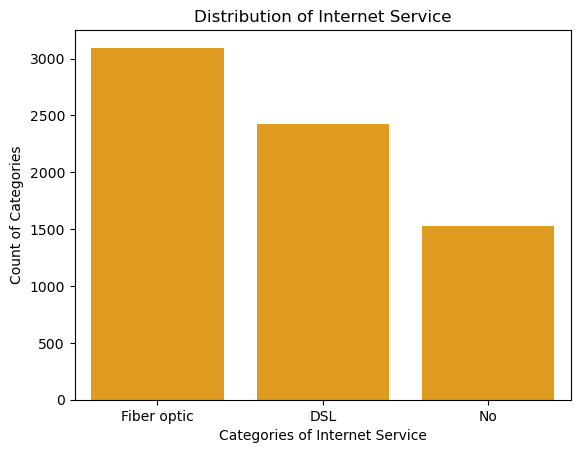

In [479]:
# Build a bar-plot for the ’InternetService’ column:
# a. Set x-axis label to ‘Categories of Internet Service’
# b. Set y-axis label to ‘Count of Categories’
# c. Set the title of plot to be ‘Distribution of Internet Service’
# d. Set the color of the bars to be ‘orange'
sns.barplot(x=df_Int_Services['Service_Category'],y=df_Int_Services['Count'],color='orange') # bulding barplot for Internet services
plt.xlabel('Categories of Internet Service') # Putting X Label as mentioned in the Qustion
plt.ylabel('Count of Categories') # Putting Y Label as mentioned in the Qustion
plt.title('Distribution of Internet Service') # Putting Title as mentioned in the Qustion

Text(0.5, 1.0, 'Distribution of tenure')

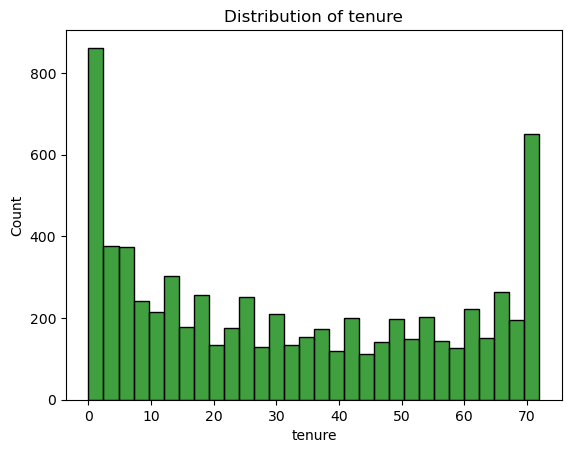

In [480]:
# Build a histogram for the ‘tenure’ column:
# a. Set the number of bins to be 30
# b. Set the color of the bins to be ‘green’
# c. Assign the title ‘Distribution of tenure
sns.histplot(df['tenure'],bins=30,color='green') # Bulding Histogram for tenure column
plt.title('Distribution of tenure') # Putting title as mentioned in the qustion

Text(0.5, 1.0, 'Tenure vs Monthly Charges')

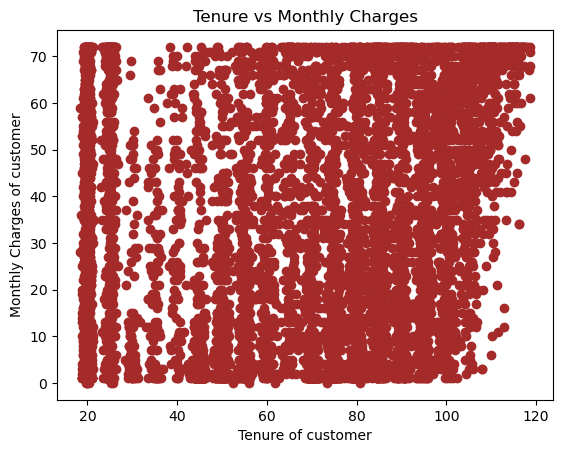

In [481]:
# Build a scatter-plot between ‘MonthlyCharges’ and ‘tenure’. Map
# ‘MonthlyCharges’ to the y-axis and ‘tenure’ to the ‘x-axis’:
# a. Assign the points a color of ‘brown’
# b. Set the x-axis label to ‘Tenure of customer’
# c. Set the y-axis label to ‘Monthly Charges of customer’
# d. Set the title to ‘Tenure vs Monthly Charges’
plt.scatter(x=df['MonthlyCharges'],y=df['tenure'],color='brown') # Bulding scatter plot
plt.xlabel('Tenure of customer') # Putting X Label as mentioned in the Qustion
plt.ylabel('Monthly Charges of customer') # Putting Y Label as mentioned in the Qustion
plt.title('Tenure vs Monthly Charges') # Putting Title as mentioned in the Qustion

<Axes: xlabel='tenure', ylabel='Contract'>

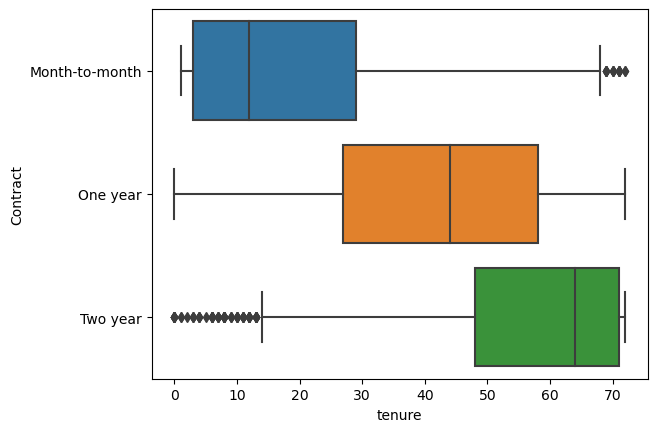

In [482]:
# e. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis & f. ‘Contract’ on the x-axis.
sns.boxplot(x=df['tenure'],y=df['Contract']) # Box Plot for tenure and contract

# Implementing ML Models

## Linear Regression

In [483]:
# Build a simple linear model where dependent variable is ‘MonthlyCharges’ and independent variable is ‘tenure’:
# a. Divide the dataset into train and test sets in 70:30 ratio.
# b. Build the model on train set and predict the values on test set
# c. After predicting the values, find the root mean square error
# d. Find out the error in prediction & store the result in ‘error’
# e. Find the root mean square error

In [484]:
# Splitting the data
X= df.loc[:,['tenure']]# Creating the X variable for independent feature which is 'Tenure'
y= df['MonthlyCharges'] # Creating the y variable for dependent feature which is 'Monthly Charges'

In [485]:
# Importing the traintestsplit function to split the data into train and test
from sklearn.model_selection import train_test_split 
# Creating the variables to put train and test data 
# and setting the train and test size 70:30 ration as mentioned in the qustion
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [486]:
from sklearn.linear_model import LinearRegression # Importing the Linear Regression model
Le = LinearRegression()  # assigening the Model to a variable called 'Le'
Liner_Reg_model = Le.fit(X_train,y_train) # Fitting the train data to the Linear Regression Model

In [487]:
y_predict= Le.predict(X_test) # Making predictions

In [488]:
y_predict # Checking the Predicted values with Linear Regression Model

array([55.10659011, 67.43520921, 70.82557946, ..., 73.29130328,
       60.96268418, 61.57911514])

In [489]:
from sklearn.metrics import * # Importing all Mathamatical functions to evaluate the model performance

In [490]:
mse=mean_squared_error(y_test,y_predict) # Creating variable to Check the mse 

In [491]:
mse

845.6091871095867

In [492]:
error =mse # assigening the mse to a varibale called 'error' as mentioned in the qustion
error

845.6091871095867

In [493]:
rmse = r2_score(y_test,y_predict)*100 # Checking the RMSE value
rmse

5.856035027031625

## Logistic Regression:

In [494]:
# Build a simple logistic regression model where dependent variable is Churn’ and independent variable is ‘MonthlyCharges’:
# a. Divide the dataset in 65:35 ratio
# b. Build the model on train set and predict the values on test set
# c. Build the confusion matrix and get the accuracy score

In [495]:
from sklearn.preprocessing import LabelEncoder # Importing the Label Encoder to encoding the categorical data point into the values 
LEncoder = LabelEncoder() # assigening the Label Encoder to a variable called LEncoder
df['Churn']=LEncoder.fit_transform(df['Churn']) # transforming the Data points in the Churn column into numerical values, so we can perform mathamatical operation on them.

In [496]:
Log_X = df.loc[:,['MonthlyCharges']]# Creating Log_X variable with Monthly Charges
Log_y = df['Churn']

In [497]:
# Splitting the data into Train and test using train test split function 
# assigening the test size 65:35 ration as asked in the qustion
Log_X_train,Log_X_test,Log_y_train,Log_y_test=train_test_split(Log_X,Log_y,test_size=0.35,random_state=42)

In [498]:
from sklearn.linear_model import LogisticRegression # Importing the Logistic regression model
Log_Reg = LogisticRegression() # assigening model to a variable called Log_REg
Log_Reg_Model = Log_Reg.fit(Log_X_train,Log_y_train) # Fitting the model with train data

In [499]:
Log_y_predict = Log_Reg.predict(Log_X_test) # Making the Predictions
Log_y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [500]:
# Using the confusion matrix for check number of correct and wrongly predicted values
cm = confusion_matrix(Log_y_test,Log_y_predict) 
cm

array([[1797,    0],
       [ 669,    0]], dtype=int64)

In [501]:
# Checking the accuracy score
Accuracy_Score = accuracy_score(Log_y_test,Log_y_predict)*100

In [502]:
Accuracy_Score

72.87104622871047

### Multiple Logistic Regression Model

In [503]:
# d. Build a multiple logistic regression model where dependent variable
# is ‘Churn’ and independent variables are ‘tenure’ and‘MonthlyCharges’
# e. Divide the dataset in 80:20 ratio
# f. Build the model on train set and predict the values on test set
# g. Build the confusion matrix and get the accuracy score

In [504]:
# Creating a variable called Multi_Log_X for assigening the independent columns 'Tenure' and "Monthly Charges"
Multi_Log_X = df.loc[:,['tenure','MonthlyCharges']] 
Multi_Log_y = df.loc[:,['Churn']] # Creating a variable called Multi_Log_y for assigening the dependent column 'Churn'

In [505]:
# Splitting the the data into train and test using train test split function and setting the test size as 70:20 ratio
Multi_Log_X_train,Multi_Log_X_test,Multi_Log_y_train,Multi_Log_y_test= train_test_split(Multi_Log_X,Multi_Log_y,test_size=0.20,random_state=42)

In [506]:
Multi_Log_Reg_Model =LogisticRegression() # Creating the variable called Multi_Log_Reg_Model to assigen the Log reg Model
Multi_Log_Reg_Model.fit(Multi_Log_X_train,Multi_Log_y_train) # fitting the train data into the Model

D:\ANK\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [507]:
Multi_Log_Reg_y_Predict = Multi_Log_Reg_Model.predict(Multi_Log_X_test) # Making Predictions 

In [508]:
Multi_Log_Reg_y_Predict

array([0, 0, 0, ..., 0, 0, 0])

In [509]:
# Using Confusion Matrix Checking the Number of Correct and wrongly predicted values
cm_Log = confusion_matrix(Multi_Log_y_test,Multi_Log_Reg_y_Predict)

In [510]:
cm_Log

array([[944,  92],
       [193, 180]], dtype=int64)

In [511]:
# Checking the Accuracy score
Multi_Log_Accuracy_Score=accuracy_score(Multi_Log_y_test,Multi_Log_Reg_y_Predict)*100
Multi_Log_Accuracy_Score

79.77288857345636

### Decision Tree

In [512]:
# Build a decision tree model where dependent variable is ‘Churn’ and independent variable is ‘tenure’:
# a. Divide the dataset in 80:20 ratio
# b. Build the model on train set and predict the values on test set
# c. Build the confusion matrix and calculate the accuracy

In [513]:
Dt_X = df.loc[:,['tenure']] # Creating teh DT_X varible to put the independent feature called 'tenure'
Dt_y = df.loc[:,['Churn']] # Creating teh DT_y varible to put the dependent feature called 'Churn'

In [514]:
# Splitting the data into train and test using train test split function and the test size will be 0.20 as asked in the qustion
Dt_X_train,Dt_X_test,Dt_y_train,Dt_y_test=train_test_split(Dt_X,Dt_y,test_size=0.20,random_state=42)

In [515]:
from sklearn.tree import DecisionTreeClassifier # Importing the Decision Tree Algoritham
Dt_model = DecisionTreeClassifier(random_state=42) # Setting the model into a variable called DT_model and putting the random state as 42.
Dt_model.fit(Dt_X_train,Dt_y_train) # fitting the Trained data into the DT MOdel

DecisionTreeClassifier(random_state=42)

In [516]:
Dt_y_Predict = Dt_model.predict(Dt_X_test) # Making Predections

In [517]:
Dt_y_Predict

array([1, 0, 0, ..., 0, 0, 1])

In [518]:
# Using Confusion Matrix Checking the Number of Correct and wrongly predicted values
Dt_cm = confusion_matrix(Dt_y_test,Dt_y_Predict)
Dt_cm

array([[951,  85],
       [257, 116]], dtype=int64)

In [519]:
# Checking the Accuracy score
Dt_Accuracy_Score = accuracy_score(Dt_y_test,Dt_y_Predict)*100
Dt_Accuracy_Score

75.72746628814762

### Random Forest:

In [520]:
# Build a Random Forest model where dependent variable is ‘Churn’ and
# independent variables are ‘tenure’ and ‘MonthlyCharges’:
# a. Divide the dataset in 70:30 ratio
# b. Build the model on train set and predict the values on test set
# c. Build the confusion matrix and calculate the accuracy

In [521]:
RF_X = df.loc[:,['tenure','MonthlyCharges']] # Creating the Variable called RF_X for assigening the Independent Columns like Tenure and Monthly Charges
RF_y = df.loc[:,['Churn']] # Creating the variable called RF_y for assigening the dependent column called 'Churn'

In [522]:
# Splitting the data into train and test using train test split function and the test size will be 0.30 as asked in the qustion

RF_X_train,RF_X_test,RF_y_train,RF_y_test=train_test_split(RF_X,RF_y,test_size=0.30,random_state=42)

In [523]:
from sklearn.ensemble import RandomForestClassifier # Importing the Random Forest Model
RF_model = RandomForestClassifier() # Creating a variable callled RF_model to assigen the Model for using simply.

In [524]:
RF_model.fit(RF_X_train,RF_y_train) # Fitting the Trained Data into the Model

C:\Users\UDAY\AppData\Local\Temp\ipykernel_14964\138921016.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(RF_X_train,RF_y_train) # Fitting the Trained Data into the Model


RandomForestClassifier()

In [525]:
RF_y_predict = RF_model.predict(RF_X_test) # Making Predections

In [526]:
RF_y_predict

array([1, 0, 0, ..., 0, 0, 0])

In [527]:
# Using Confusion Matrix Checking the Number of Correct and wrongly predicted values
RF_cm = confusion_matrix(RF_y_test,RF_y_predict) 
RF_cm

array([[1335,  204],
       [ 305,  269]], dtype=int64)

In [528]:
# Checking the Accuracy score
RF_Accuracy_Score = accuracy_score(RF_y_test,RF_y_predict)*100
RF_Accuracy_Score

75.9110269758637

# Thank You !